In [2]:
%matplotlib inline

# 1. Introduction

In this notebook I am making a first introduce to scikit learn and how to segment an image.

# 2. Background segmetation 

Separating the foreground of the image from the background.

My first aproach is to test some methods with our first microscope images. The steps I will take in the first aproach will be these:
1. The first step is to convert the original image to grayscale image.
2. The second step is to test some method to binarize the image (If it is possible, we should apply threshold trier first)
3. The third step is image segmentation.

## 2.1. Converting the original image to grayscale image.

In [3]:
import skimage
from skimage.color.adapt_rgb import adapt_rgb
from skimage.color import rgb2gray
from skimage import filters


def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)

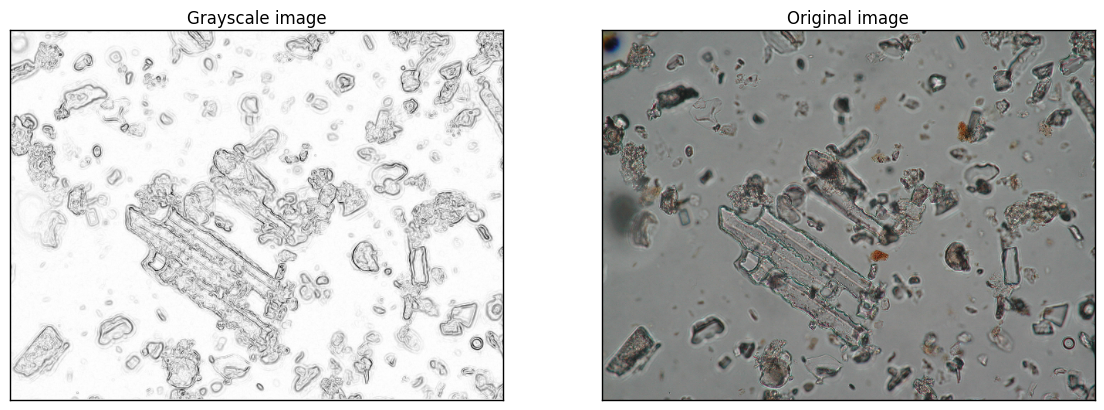

In [4]:
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
from skimage import io

# You should change this path
image_path = "D:\\Datos\\Dropbox\\UBU\\TFG\\Info\\2.TIF"
image = io.imread(image_path)

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, adjustable='box-forced')
ax2 = fig.add_subplot(122, sharex=ax1, sharey=ax1,
                         adjustable='box-forced')

# We use sobel_gray to convert the original image into grayscale
grayscale_image = rescale_intensity(1 - sobel_gray(image))
# And we show it below on your left hand side
ax1.imshow(grayscale_image, cmap=plt.cm.gray)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title("Grayscale image")

# We show the original image on your right hand side
ax2.imshow(image)
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title("Original image")


In [5]:
# Some of the threshold methods to test
# ({'Isodata': thresh(threshold_isodata),
#                            'Li': thresh(threshold_li),
#                            'Mean': thresh(threshold_mean),
#                            'Minimum': thresh(threshold_minimum),
#                            'Otsu': thresh(threshold_otsu),
#                            'Triangle': thresh(threshold_triangle),
#                            'Yen': thresh(threshold_yen)}

## 2.2. Binarize the grayscale image

### 2.2.1. ¿Which algorithm will give the best results?

Scikit-learn provide us a nice tool to decide which is the best thresholding algorithm for our data without a deep understanding of their mechanisms.

(But doesn't work.)

[More info about the thresholding algorithms in Scikit-learn](http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html#sphx-glr-auto-examples-xx-applications-plot-thresholding-py)


In [6]:
#from skimage.filters import try_all_threshold

# try_all_threshold

# img = grayscale_image

# fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
# plt.show()

## 2.2.2. Testing with Otsu thresholding

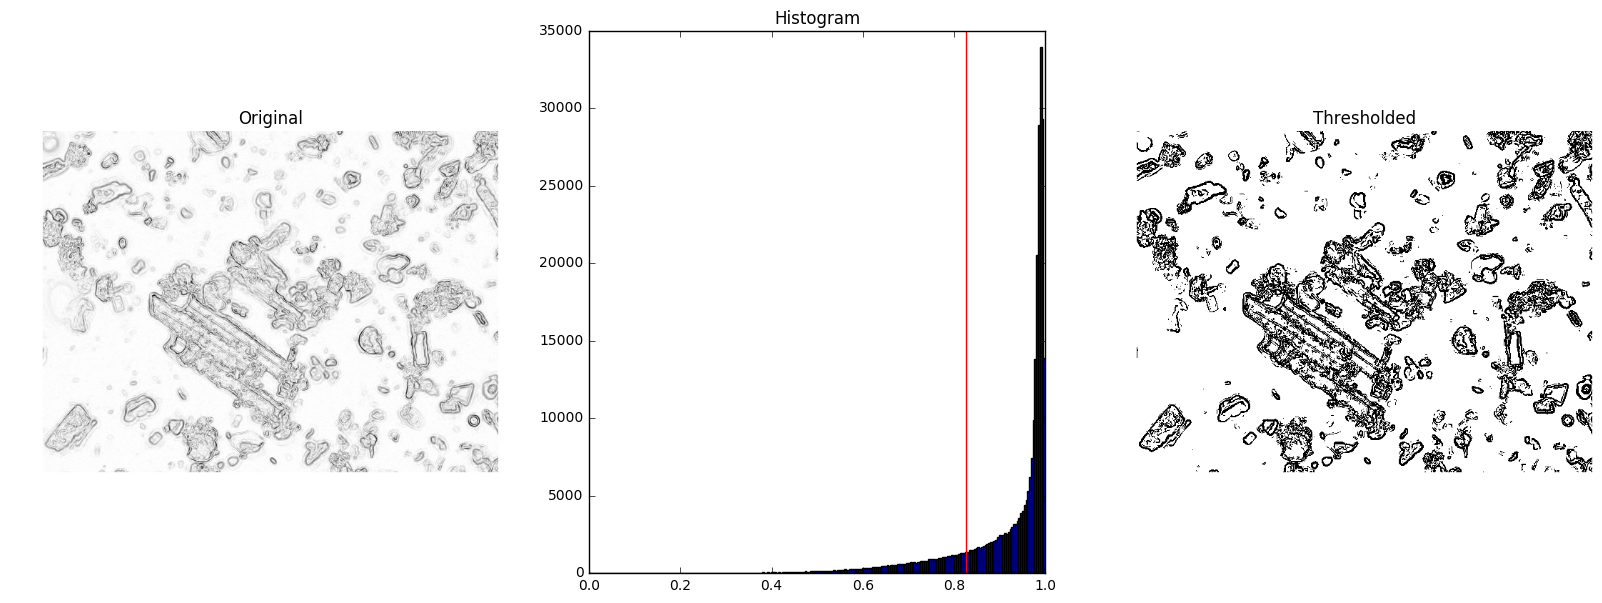

In [7]:
from skimage.filters import threshold_otsu


image = grayscale_image
thresh = threshold_otsu(image)
binary_image = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 7))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary_image, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## 3. Image segmentation ( Phytoliths recognition )

Image segmentation is the task of labeling the pixels of objects of interest in an image.

### 3.1.  Watershed segmentation

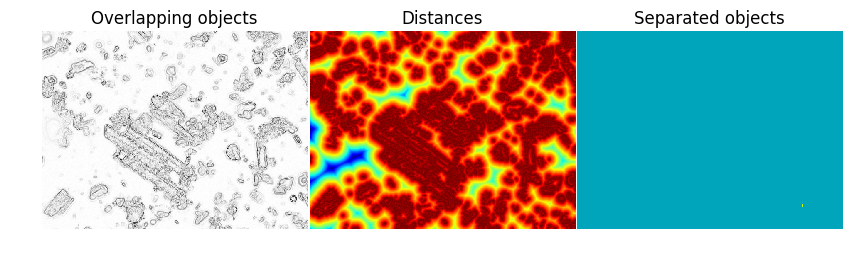

In [12]:
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(binary_image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.7), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax0, ax1, ax2 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Overlapping objects')
ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title('Distances')
ax2.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title('Separated objects')

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

I like to say that all the code above was made from the examples that scikit learn provide us